# OilyGiant

La empresa OilyGiant nos contrata para encontrar el mejor lugar para un nuevo pozo.

Los pasos para elegir la mejor ubicación son los siguientes:

- Recolectar los parámetros del pozo de petróleo en la región seleccionada: calidad del petróleo y volumen de reservas
- Construir un modelo para predecir el volumen de reservas en los nuevos pozos
- Seleccionar los pozos de petróleo con los valores estimados más altos
- Elegir la región con el mayor beneficio total para los pozos de petróleo seleccionados

Dentro de los datos a analizar vamos a encontrar 3 dataframe con los datos de exploración geológica de las tres regiones:
- `id` — identificador único de pozo de petróleo
- `f0, f1, f2 `— tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
- `product` — volumen de reservas en el pozo de petróleo (miles de barriles).

Importación de los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Carga de los datos

In [3]:
df_geo_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_3 = pd.read_csv('/datasets/geo_data_2.csv')

## Exploración de los datos

Veamos como se comportan los datos en las diferentes regiones, para cada región voy a:
- Ver el dataframe
- Observar los `Dtype`
- Buscar valores ausentes
- Fijarme si existen valores duplicados
- Ver la descripción del Dataframe para observar como se comportan las medias, minimos, maximos, etc.

### Región 1

In [4]:
df_geo_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [5]:
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Observemos que los Dtype se encuentren correctos

Se ve todo bien, ahora veamos si existen valores nulos (NaN)

In [6]:
df_geo_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
df_geo_1.duplicated().sum()

0

En la región 1 no hay NaN, ni valores duplicados.

In [8]:
df_geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Vemos que la media es de 92.5 miles de barriles y el valor maximo de miles de barriles es de 185.36.

### Región 2

In [9]:
df_geo_2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [10]:
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Los Dtype se encuentran bien cargados.

In [11]:
df_geo_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [12]:
df_geo_2.duplicated().sum()

0

Tampoco se observan ni duplicados ni valores ausentes.

In [13]:
df_geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


En este caso la media de milies de barriles es de 68.82 un valor menor que el de la región 2 al igual que el maximo de barriles que es de 137.94.

### Región 3

In [14]:
df_geo_3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [15]:
df_geo_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
df_geo_3.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [17]:
df_geo_3.duplicated().sum()

0

En este caso todo se encuentra correcto al igual que las 2 regiónes anteriores.

In [18]:
df_geo_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Aca tambien vemos que la media de los miles de barriles es parecida a la región 1 con un valore de 95 y el maximo de 190.03 (mayor que en la región 1).

## Visualización de los datos

Ahora graficaremos la distribución de los diferentes pozos para cada región para que nos de una mejor idea de como se comporta cada región.

### Región 1

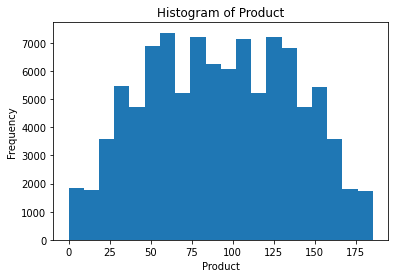

In [19]:
# Crear un histograma de la columna 'product'
plt.hist(df_geo_1['product'], bins=20)

# Agregar etiquetas y títulos
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Histogram of Product')

# Mostrar el histograma
plt.show()

### Región 2

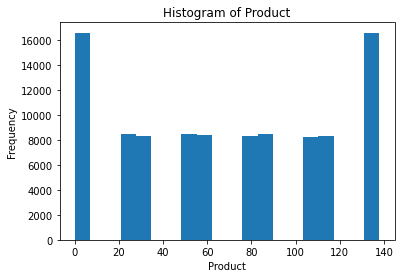

In [20]:
# Crear un histograma de la columna 'product'
plt.hist(df_geo_2['product'], bins=20)

# Agregar etiquetas y títulos
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Histogram of Product')

# Mostrar el histograma
plt.show()

### Región 3

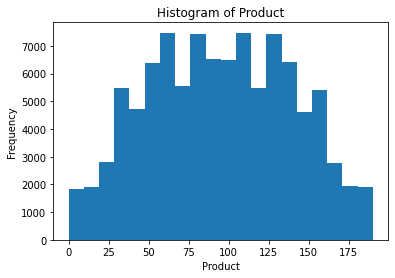

In [21]:
# Crear un histograma de la columna 'product'
plt.hist(df_geo_3['product'], bins=20)

# Agregar etiquetas y títulos
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.title('Histogram of Product')

# Mostrar el histograma
plt.show()

### Conclusiones intermedias

De los histogramas podemos sacar las siguientes conclusiones:
- Tanto la Región 1 como la Región 3 se comportan de manera similiar en la distribución de los barriles por pozo.
- En la Región 2 se observan en ambos extremos del grafico una gran concentración de  barriles.
- Tambien en la Región 2 se observan que el resto de los pozos(sin contar los extremos), poseen casi la misma cantidad de milies de barriles, al igual que saltos constantes de barriles en donde a veces no hay petroleo y en otras si hay.
- A grandes rasgos pareceria que las mejores regiones son la 1 y la 3.

## Modelo de Entrenamiento

Voy a crear una función que me entrene un modelo para cada región. En donde voy a usar el `0.25%` de los datos para la pruena y el `0.75%` para el entrenamiento.

Tambien voy a usar como `Features` a los valores de `'f0', 'f1' y 'f2'`, no asi los valores de `'id'` ya que es un valor unico para cada pozo y para que no afecte al entrenamiento del modelo. Como `Target` usare los valores de `'product'`.

Me interesa saber el volumen promedio de reservas de cada región para comparar el volumen de cada región con el volumen del modelo y medir asi su eficacia a la hora de la predicción y tambien voy a mostrar los valores de RECM, para comparar las diferencias entre los valores previstos y los valores observados, entre región y modelo.

### Función para entrenamiento

In [22]:
def entrenar_modelo(df_geo):
    # Seleccionar las características y el objetivo
    X = df_geo[['f0', 'f1', 'f2']]
    y = df_geo['product']

    # Dividir los datos en conjunto de entrenamiento y conjunto de validación
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=12345)

    # Crear y ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de validación
    y_pred = model.predict(X_val)

    # Guardar las predicciones y las respuestas correctas en un DataFrame
    df_results = pd.DataFrame({'valores_reales': y_val, 'valores_modelo': y_pred})

    # Calcular el volumen promedio de las reservas previstas y el RMSE del modelo
    average_predicted_volume = df_results['valores_modelo'].mean()
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    # Imprimir los resultados
    print("Volumen promedio de reservas previstas:", average_predicted_volume)
    print("RMSE:", rmse)
    print("=" * 40)

    # Devolver el DataFrame de resultados
    return df_results

### Entrenamiento de los modelos para cada Región

In [23]:
# Entrenar y evaluar el modelo para la Región 1
df_results_1 = entrenar_modelo(df_geo_1)

# Entrenar y evaluar el modelo para la Región 2
df_results_2 = entrenar_modelo(df_geo_2)

# Entrenar y evaluar el modelo para la Región 3
df_results_3 = entrenar_modelo(df_geo_3)

Volumen promedio de reservas previstas: 92.59256778438035
RMSE: 37.5794217150813
Volumen promedio de reservas previstas: 68.728546895446
RMSE: 0.893099286775617
Volumen promedio de reservas previstas: 94.96504596800489
RMSE: 40.02970873393434


Cuando comparamos las medias de los miles de barriles entre las regiones y las de los modelos vemos que son muy parecidas, pero la `raiz del error cuadratico` son grandes en las regiones 1 y 3, mientras que en la región 2 es mas concisa.

Voy a imprimir cada modelo para ver como quedo.

In [24]:
print(df_results_1.head(5))
print()
print(df_results_2.head(5))
print()
print(df_results_3.head(5))

       valores_reales  valores_modelo
71751       10.038645       95.894952
80493      114.551489       77.572583
2655       132.603635       77.892640
53233      169.072125       90.175134
91141      122.325180       70.510088

       valores_reales  valores_modelo
71751       80.859783       82.663314
80493       53.906522       54.431786
2655        30.132364       29.748760
53233       53.906522       53.552133
91141        0.000000        1.243856

       valores_reales  valores_modelo
71751       61.212375       93.599633
80493       41.850118       75.105159
2655        57.776581       90.066809
53233      100.053761      105.162375
91141      109.897122      115.303310


## Calculos

Ahora calcularemos los costos del proyecto, el presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares. Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares 

In [31]:
presupuesto = 100_000_000
n_pozos = 200
precio_barril = 4500
presu_pozo = presupuesto / n_pozos
volumen_inversion = presupuesto / precio_barril / n_pozos
print(f"Presupuesto para cada pozo:", presu_pozo)
print(f"Volumen de barril minimos por cada pozo (200) para recuperar la inversión:", round(volumen_inversion, 2))

Presupuesto para cada pozo: 500000.0
Volumen de barril minimos por cada pozo (200) para recuperar la inversión: 111.11


Una vez que defini las diferentes variables para los calculos voy a crear una funcion para que me calcule:
- El `total de miles de barriles` por región para los mejores 200 pozos de esa región.
- La `ganancia en USD` de esos barriles.
- Y la `ganancia total` que obtengo de cada región una vez que le reste el presupuesto por esos pozos

In [33]:
def calcular_resultados(df_results, precio_barril, presupuesto):
    # Ordenar el DataFrame de mayor a menor
    df_sorted = df_results.sort_values('valores_modelo', ascending=False)

    # Seleccionar las primeras 200 filas del DataFrame
    df_top_200 = df_sorted.head(200)

    # Sumar los valores de la columna "valores_predichos"
    total_barril = df_top_200["valores_modelo"].sum()
    ganancia_barril = total_barril * precio_barril
    ganancia_total = ganancia_barril - presupuesto

    # Imprimir los resultados
    print(f"Total de barriles de petróleo:", round(total_barril, 2))
    print(f"Total de USD generados por los barriles:", round(ganancia_barril, 2))
    print(f"Ganancia total:", round(ganancia_total, 2))
    print("=" * 40)


In [34]:
# Calcular resultados para la Región 1
calcular_resultados(df_results_1, precio_barril, presupuesto)

# Calcular resultados para la Región 2
calcular_resultados(df_results_2, precio_barril, presupuesto)

# Calcular resultados para la Región 3
calcular_resultados(df_results_3, precio_barril, presupuesto)


Total de barriles de petróleo: 31102.33
Total de USD generados por los barriles: 139960488.77
Ganancia total: 39960488.77
Total de barriles de petróleo: 27746.03
Total de USD generados por los barriles: 124857120.52
Ganancia total: 24857120.52
Total de barriles de petróleo: 29603.9
Total de USD generados por los barriles: 133217543.96
Ganancia total: 33217543.96


Aqui vemos la mayor ganancia que obtendriamos segun nuestro modelo es en la Región 1, seguida de la Región 3 y por último la Región 2. 

Pero estos calculos no tienen en cuenta el RMSE de cada Región.

## Bootstraping

Usare la técnica bootstrapping con 1000 muestras para encontrar la distribución del beneficio promedio, con un intervalo de confianza del 95% y el riesgo de pérdidas. Después de la evaluación de riesgo, manténdre solo las regiones con riesgo de pérdidas inferior al 2.5%

Como dijimos anteriormente al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.

Para calcular el beneficio de cada región creare una función para que me haga estos calculos.

In [ ]:
def calcular_beneficio(df):
    presupuesto = 100000000
    precio_barril = 4500
    n_muestras = 1000

    beneficios = []
    for i in range(n_muestras):
        sample = df.sample(n=500, replace=True)
        sample_sorted = sample.sort_values('valores_modelo', ascending=False)
        sample_top_200 = sample_sorted.head(200)
        total_barril = sample_top_200['valores_modelo'].sum()
        ganancia_barril = total_barril * precio_barril
        ganancia_total = ganancia_barril - presupuesto
        beneficios.append(ganancia_total)

    promedio_beneficios = np.mean(beneficios)
    intervalo_confianza = np.percentile(beneficios, [2.5, 97.5])
    print("Beneficio promedio: ${:,.2f}".format(promedio_beneficios))
    print("Intervalo de confianza del 95%: ${:,.2f} - ${:,.2f}".format(intervalo_confianza[0], intervalo_confianza[1]))

    n_perdidas = sum(1 for x in beneficios if x < 0)
    prob_perdidas = n_perdidas / n_muestras
    porcentaje_perdidas = prob_perdidas * 100
    print("Riesgo de pérdidas: {:.2f}%".format(porcentaje_perdidas))
    print("=" * 40)


In [ ]:
calcular_beneficio(df_results_1)
calcular_beneficio(df_results_2)
calcular_beneficio(df_results_3)

Una vez realizado el bootstraping vemos que la Región 2 es la que nos da mayor beneficio, algo muy diferente a lo predicho anteriormente, si bien el riesgo de perdida es de 1.30% se encuentra dentro de nuestro rango y el limite superior del rango de confianza es el de mayor ganancia tambien.

## Conclusiones

Despues de realizar los analisis que nos pidio la empresa minera podemos enumerara las siguientes conclusiones:
- El modelo de entrenamiento funciona correctamente.
- Los RMSE de las Regiones 1 y 3 son muy grandes por lo que los beneficios obtenidos de esta regiones son menores que los de la Región 2.
- Si bien las Regiones 1 y 3 poseen un gráfico de distribución mejor que el de la Región 2, esta posee una distribución mas constante de barriles, el gráfico de la distribución es asi porque se ve afectado por los extremos nada mas.
- A la hora de recomendar una Región para excavar 200 nuevos pozos, recomiendo la Región 2 ya que esta es la que tiene un mayo